In [1]:
import torch
import torchvision
from torch.utils.data import TensorDataset, Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

images = torch.load("_03_baseline_cnn/data/images.pt")
labels = torch.load("_03_baseline_cnn/data/labels.pt")
print(f"Loaded images shape: {images.shape}")
print(f"Loaded labels shape: {labels.shape}")

Loaded images shape: torch.Size([1000, 3, 224, 224])
Loaded labels shape: torch.Size([1000])


In [2]:
class TransformedTensorDataset(Dataset):
    def __init__(self, tensors, transform=None):
        self.tensors = tensors
        self.transform = transform

    def get(self, index):
        x = self.tensors[0][index]
        y = self.tensors[1][index]

        # Apply the transform only to x (typically the image)
        if self.transform:
            x = self.transform(x)

        return x, y

    def len(self):
        return len(self.tensors[0])

In [3]:
# # Sample tensors
# images = torch.ones(100, 1, 28, 28)  # e.g., MNIST-like images

# for i in range(28):
#     for j in range(28):
#         images[:, 0, i, j] = i + j

# labels = torch.randint(0, 10, (100,))

# # Define transform
# transform = transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     transforms.ColorJitter(brightness=5e-17),
#     # transforms.Normalize((0.5,), (0.5,))
# ])

# # Wrap in custom dataset
# dataset = TransformedTensorDataset((images, labels), transform=transform)

# import matplotlib.pyplot as plt

# fig, axs = plt.subplots(2, 5, figsize=(15, 3))
# for i in range(5):
#     axs[0, i].imshow(dataset[i][0].squeeze(), cmap='gray')
#     axs[1, i].imshow(dataset[i][0].squeeze(), cmap='gray')
# for ax in axs.flatten():
#     ax.axis('off')


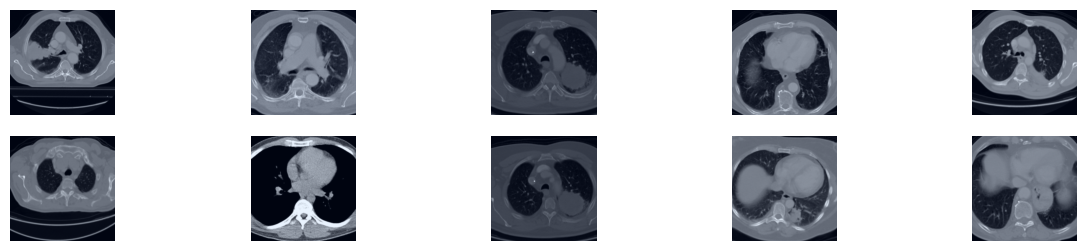

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(15, 3))

def rescale(tensor):
    return (tensor - tensor.min()) / (tensor.max() - tensor.min())

for i in range(10):
    axs[0, i % 5].imshow(rescale(images[i].squeeze().permute(1,2,0)), cmap='gray')
    axs[1, i % 5].imshow(rescale(images[i + 10].squeeze().permute(1,2,0)), cmap='gray')

for ax in axs.flatten():
    ax.axis('off')

In [5]:
dataset = TransformedTensorDataset((images, labels), transform=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=5e-17),
    transforms.Normalize((0.5,), (0.5,))
]))

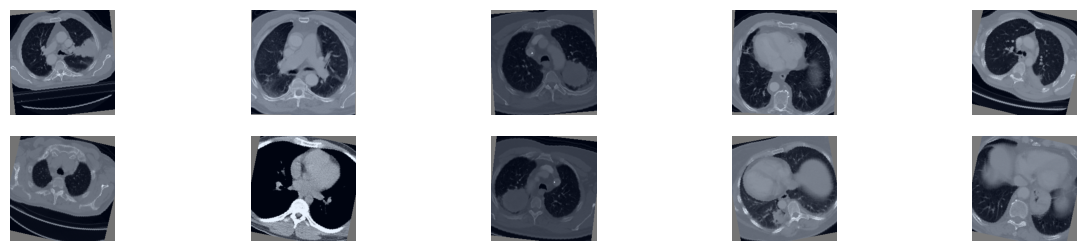

In [6]:
fig, axs = plt.subplots(2, 5, figsize=(15, 3))

def rescale(tensor):
    return (tensor - tensor.min()) / (tensor.max() - tensor.min())

for i in range(10):
    img = dataset.get(i)[0]
    axs[0, i % 5].imshow(rescale(img.squeeze().permute(1,2,0)), cmap='gray')
    img = dataset.get(i + 10)[0]
    axs[1, i % 5].imshow(rescale(img.squeeze().permute(1,2,0)), cmap='gray')

for ax in axs.flatten():
    ax.axis('off')

In [7]:
import os
savedir = "_05_ct_images/data"

if not os.path.exists(savedir + "/augmented_images.pt") or not os.path.exists(savedir + "/augmented_labels.pt"):

    AUGMENT_FACTOR = 10
    ORIGINAL_SIZE = dataset.len()
    new_images = torch.zeros((AUGMENT_FACTOR * ORIGINAL_SIZE, *images.shape[1:]))
    new_labels = torch.zeros(AUGMENT_FACTOR * ORIGINAL_SIZE, dtype=torch.long)

    for i in range(AUGMENT_FACTOR):
        for idx in range(ORIGINAL_SIZE):
            img, label = dataset.get(idx)
            new_images[i * ORIGINAL_SIZE + idx] = img
            new_labels[i * ORIGINAL_SIZE + idx] = label

    new_images = torch.mean(new_images, dim=1)

    print(f"New images shape: {new_images.shape}")
    print(f"New labels shape: {new_labels.shape}")

    torch.save(new_images, savedir + "/augmented_images.pt")
    torch.save(new_labels, savedir + "/augmented_labels.pt")

New images shape: torch.Size([10000, 224, 224])
New labels shape: torch.Size([10000])
